<a href="https://colab.research.google.com/github/ashish7493/IIITN/blob/main/Advertising_TV_Radio_Newspaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! unzip archive.zip

Archive:  archive.zip
  inflating: advertising.csv         


[==================================================] 1869 bytes downloaded
Downloaded and uncompressed: advertising-dataset
Data source import complete.


In [4]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



/kaggle/input/advertising-dataset/advertising.csv


In [64]:
advertising = pd.read_csv('/content/advertising2.csv')
advertising.head(5)

,Ad price,Sponsor Agreement,Visitor number,Visitors number,Revenue
0,230.1,37.8,69,69.2,22.1
1,44.5,39.3,45,45.1,10.4
2,17.2,45.9,69,69.3,12.0
3,151.5,41.3,58,58.5,16.5
4,180.8,10.8,58,58.4,17.9


In [65]:
advertising.rename(columns={'TV':'Ad price'}, inplace=True)

In [66]:
advertising.drop('Visitors number',axis=1,inplace=True)

In [67]:
advertising.head()

,Ad price,Sponsor Agreement,Visitor number,Revenue
0,230.1,37.8,69,22.1
1,44.5,39.3,45,10.4
2,17.2,45.9,69,12.0
3,151.5,41.3,58,16.5
4,180.8,10.8,58,17.9


In [68]:
advertising.describe()

,Ad price,Sponsor Agreement,Visitor number,Revenue
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.100000,15.130500
std,85.854236,14.846809,21.769233,5.283892
min,0.700000,0.000000,0.000000,1.600000
25%,74.375000,9.975000,12.000000,11.000000
50%,149.750000,22.900000,25.000000,16.000000
75%,218.825000,36.525000,45.000000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [36]:
%matplotlib inline

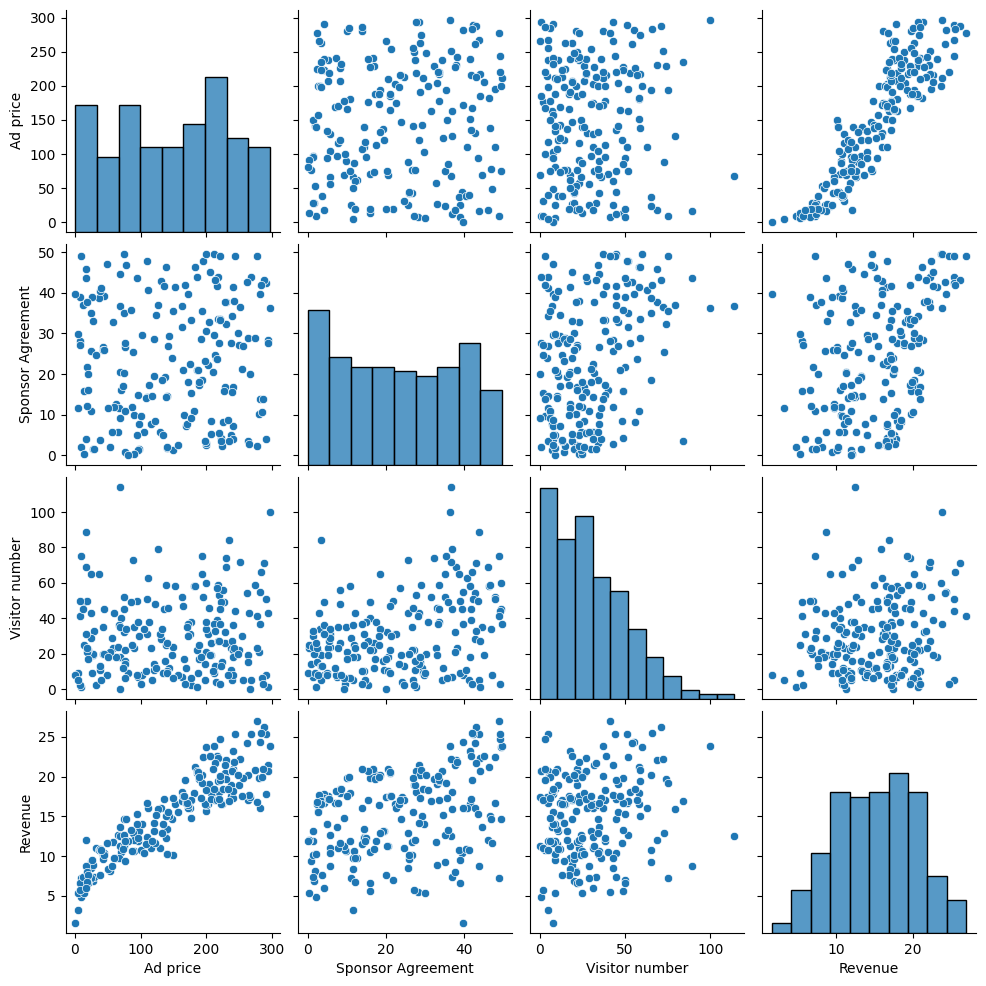

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(advertising)

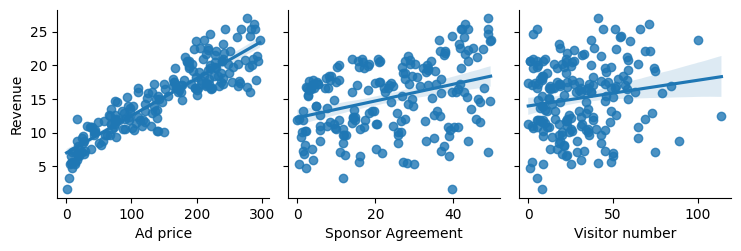

In [40]:
sns.pairplot(advertising,x_vars=['Ad price','Sponsor Agreement','Visitor number'],y_vars='Revenue',aspect=1, kind='reg')

In [42]:
X = advertising[['Ad price','Sponsor Agreement','Visitor number']]
Y = advertising['Revenue']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.7,random_state=100)

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [45]:
print(model.coef_)
print(model.intercept_)

[0.0538325  0.11003975 0.00624549]
4.337654973344879


# **Model Evaluation**

In [46]:
model_coef = pd.DataFrame(model.coef_,X_test.columns,columns=['Coeffiecients'])
model_coef

,Coeffiecients
Ad price,0.053832
Sponsor Agreement,0.110040
Visitor number,0.006245


In [47]:
Y_pred = model.predict(X_test)

Calculating Error

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test,Y_pred)
r_squared = r2_score(Y_test,Y_pred)
print('Mean squared', mse)
print('Predict square',r_squared)

Mean squared 2.6350635596300416
Predict square 0.8656495859375339


In [49]:
import statsmodels.api as sm
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)
model_l = sm.OLS(Y_train,X_train_sm).fit()
model_l.params

const                4.337655
Ad price             0.053832
Sponsor Agreement    0.110040
Visitor number       0.006245
dtype: float64

In [50]:
print(model_l.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     461.1
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           4.76e-71
Time:                        23:31:10   Log-Likelihood:                -270.60
No. Observations:                 140   AIC:                             549.2
Df Residuals:                     136   BIC:                             561.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.3377      0.35

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: >

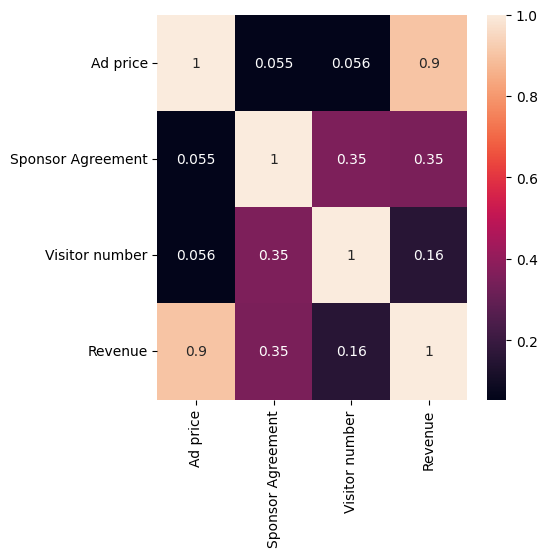

In [52]:
plt.figure(figsize=(5,5))
sns.heatmap(advertising.corr(),annot = True)

In [54]:
# Removing Newspaper
X_train_new = X_train[['Ad price','Sponsor Agreement','Visitor number']]
X_test_new = X_test[['Ad price','Sponsor Agreement','Visitor number']]
model.fit(X_train_new,Y_train)

LinearRegression()

In [55]:
Y_pred_new = model.predict(X_test_new)

Text(0, 0.5, 'Revenue')

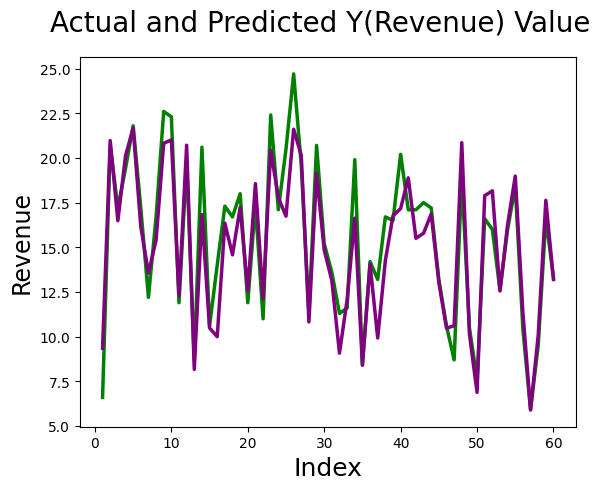

In [57]:

# Actual Sales value VS Predicted Revenue
C = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(C,Y_test, color="green", linewidth=2.5, linestyle="-")
plt.plot(C,Y_pred, color="purple", linewidth=2.5, linestyle="-")
plt.suptitle('Actual and Predicted Y(Revenue) Value', fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Revenue',fontsize=17)